In [15]:
import pandas as pd
from sqlalchemy import create_engine
import sqlalchemy
from key import url
import matplotlib.pyplot as plt

In [16]:
#create a connection to postgres
engine = sqlalchemy.create_engine(url)

#create engine 
conn = engine.connect()
#query all data
employees_df = pd.read_sql("SELECT * FROM employees",conn)
employees_df

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991
...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994


In [18]:
titles_df = pd.read_sql("SELECT * FROM titles",conn)
#rename column title
titles_df.rename(columns = {'title_id': 'emp_title_id'}, inplace = True)
titles_df

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [19]:
#merge tables
emp_sal = pd.merge(employees_df,salaries_df)
emp_sal

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000
...,...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988,69696
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995,75355
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988,61886
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994,62772


In [81]:
# merge tables to add staff titles
df = pd.merge(emp_sal,titles_df)
df


,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000,Staff
1,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000,Staff
2,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087,Staff
3,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988,87084,Staff
4,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,63016,Staff
...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,11/9/1959,Arie,Staelin,M,1/1/1985,72446,Manager
300020,111133,m0001,3/16/1955,Hauke,Zhang,M,12/30/1986,71148,Manager
300021,110085,m0001,10/28/1959,Ebru,Alpin,M,1/1/1985,60026,Manager
300022,110386,m0001,10/4/1953,Shem,Kieras,M,10/14/1988,40000,Manager


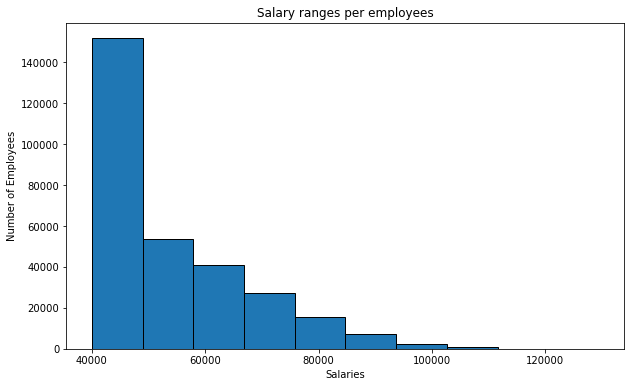

In [90]:
#Create histogram
plt.hist(df.salary, edgecolor='black')
plt.gcf().set_size_inches(10,6)
plt.title('Salary ranges per employees')
plt.xlabel('Salaries')
plt.ylabel('Number of Employees')

plt.show()


In [ ]:
mean = df.groupby(['title'])['salary'].mean().round(2)
mean

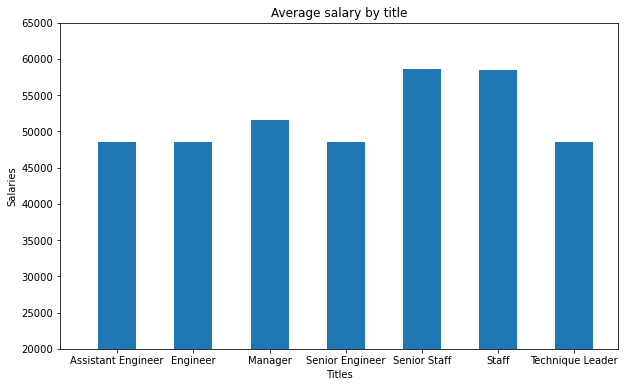

In [77]:
#Create bar chart
titles = ['Assistant Engineer','Engineer','Manager','Senior Engineer','Senior Staff','Staff','Technique Leader']
salary = df.groupby(['title'])['salary'].mean().round(2)

resize = plt.figure(figsize=(10,6))
plt_bar = plt.bar(titles, salary,width=0.50)
ticks = plt.xticks(titles)

plt.xlim(-.75)
plt.ylim(20000,65000)
plt.title("Average salary by title")
plt.xlabel("Titles")
plt.ylabel("Salaries")
plt.show()